In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [19]:
player_data = pd.read_csv("DataCollection/Player_Stats/player_stats_2021-22.csv")

In [20]:
player_data = player_data.fillna(0)
player_data = player_data[player_data["MP"] > 15]
player_data.reset_index(inplace=True)

## Normalize the data

In [21]:
features = player_data.loc[:, ~player_data.columns.isin(["Player", "Pos", "Tm"])].values
target = player_data.loc[:,["Pos"]].values

x = StandardScaler().fit_transform(features)

## Reduce Dimensionality to 2 components

In [22]:
pca = PCA(n_components=2)
components = pca.fit_transform(x)

componentsDf = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])
finalDf = pd.concat([componentsDf, player_data[['Pos', "Player"]]], axis = 1)

### Plot 2D PCA

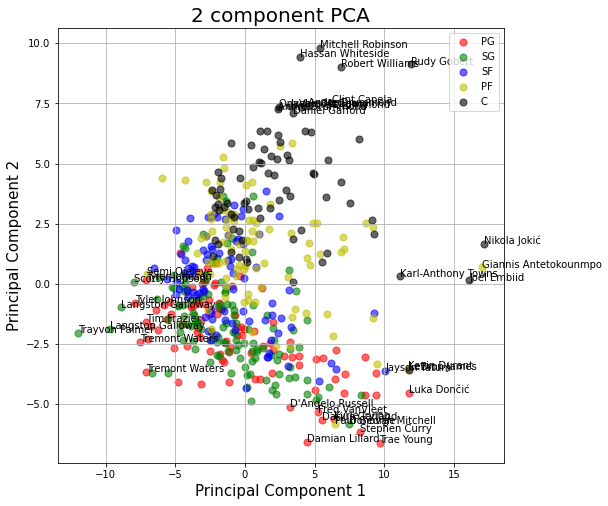

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['PG', 'SG', 'SF', 'PF', 'C']
colors = ['r', 'g', 'b', 'y', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Pos'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], finalDf.loc[indicesToKeep, 'PC2'], 
               c=color, s=50, alpha=.6)
ax.legend(targets)
ax.grid()

for i, data in finalDf.iterrows():
    if data["PC1"] < -7 or data["PC2"] > 7 or data["PC1"] > 10 or data["PC2"] < -5:
        ax.annotate(data["Player"], (data["PC1"], data["PC2"]))

# Clustering

C:\Users\140775\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


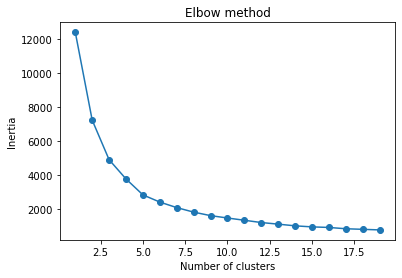

In [30]:
data = list(zip(finalDf["PC1"], finalDf["PC2"]))

inertias = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,20), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

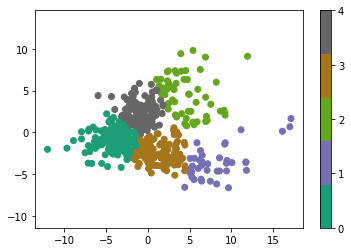

In [46]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
cmap = plt.cm.get_cmap('Dark2', 5)
finalDf['Cluster'] = kmeans.labels_
plt.scatter(finalDf["PC1"], finalDf["PC2"], c=finalDf['Cluster'], cmap=cmap)
plt.axis('equal')
plt.colorbar(ticks=[0, 1, 2, 3, 4])
plt.show()

In [51]:
finalDf[finalDf["Cluster"] == 1]

,PC1,PC2,Pos,Player,Cluster
13,17.002218,0.685257,PF,Giannis Antetokounmpo,1
25,6.449773,-3.936527,PG,LaMelo Ball,1
36,5.070508,-4.842316,SG,Bradley Beal,1
47,8.303130,-4.620903,SG,Devin Booker,1
51,5.886724,-1.234157,PF,Miles Bridges,1
60,6.524008,-3.541632,SF,Jaylen Brown,1
66,9.262498,-1.228856,SF,Jimmy Butler,1
95,8.245785,-6.159057,PG,Stephen Curry,1
99,9.474803,-3.349530,PF,DeMar DeRozan,1
107,11.805039,-4.525480,PG,Luka Dončić,1
